# Player Analysis

In [615]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [616]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [617]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [618]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [619]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only matches of CSK and MI

In [620]:
CSK_MI =matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Mumbai Indians'))]

In [621]:
CSK_MI.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
15486,67,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,1,Chennai Super Kings,Mumbai Indians,...,SM Pollock,1,0,0,0,0,1,1,NaN,NaN
15487,67,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,1,Chennai Super Kings,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
15488,67,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,1,Chennai Super Kings,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
15489,67,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,1,Chennai Super Kings,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
15490,67,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,1,Chennai Super Kings,Mumbai Indians,...,SM Pollock,0,0,0,0,4,0,4,NaN,NaN


In [622]:
CSK_MI.match_id.nunique()

28

In [623]:
CSK_MI.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

## Quinton de Kock run of boundaries in first 10 balls

- Against CSK

In [624]:
qdk = CSK_MI[(CSK_MI["batting_team"]=="Mumbai Indians")&(CSK_MI["batsman"]=="Q de Kock")]

In [625]:
qdk.match_id.unique()

array([11151, 11335, 11412, 11415], dtype=int64)

In [626]:
qdk_runs = qdk.groupby(['match_id',"batsman"]).agg({"batsman_runs":"sum","ball":"count"})

qdk_runs.columns = ["Runs Scored","Ball faced"]

qdk_runs

,,Runs Scored,Ball faced
match_id,batsman,,
11151,Q de Kock,5,7
11335,Q de Kock,16,10
11412,Q de Kock,11,13
11415,Q de Kock,30,18


In [627]:
bound = [4,6]
runs = []
boundary_runs = []
for value in qdk.groupby("match_id"):
    count = 1
    d = list(value[1]["batsman_runs"])
    print(d)
    runs.clear()
    for i in d:
        while(count<=10):
            count = count+1
            if i in bound:
                runs.append(i)
            break
    c = sum(runs)
    boundary_runs.append(c)
    

boundary_runs            

[0, 0, 0, 0, 1, 4, 0]
[0, 3, 0, 1, 1, 6, 4, 0, 1, 0]
[0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 0, 0]
[1, 0, 0, 0, 0, 6, 1, 0, 6, 0, 6, 1, 1, 1, 1, 0, 6, 0]


[4, 10, 8, 12]

In [628]:
qdk_runs["Boundary runs in 10 balls"] = boundary_runs

qdk_runs

,,Runs Scored,Ball faced,Boundary runs in 10 balls
match_id,batsman,,,
11151,Q de Kock,5,7,4
11335,Q de Kock,16,10,10
11412,Q de Kock,11,13,8
11415,Q de Kock,30,18,12


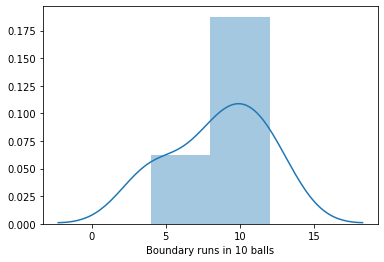

In [629]:
sns.distplot(qdk_runs["Boundary runs in 10 balls"])

In [630]:
print("Average runs made by boundaries by QDK in first 10 balls against CSK :{}".format(round(qdk_runs["Boundary runs in 10 balls"].mean())))

Average runs made by boundaries by QDK in first 10 balls against CSK :8


- Overall

In [631]:
qdk_overall = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["batsman"]=="Q de Kock")]

In [632]:
qdk_overall.match_id.nunique()

16

In [633]:
qdk_runs_overall = qdk_overall.groupby(['match_id',"batsman"]).agg({"batsman_runs":"sum","ball":"count"})

qdk_runs_overall.columns = ["Runs Scored","Ball faced"]

qdk_runs_overall

,,Runs Scored,Ball faced
match_id,batsman,,
11139,Q de Kock,29,16
11143,Q de Kock,23,20
11145,Q de Kock,64,40
11151,Q de Kock,5,7
11310,Q de Kock,19,18
11315,Q de Kock,24,23
11318,Q de Kock,83,53
11322,Q de Kock,41,27
11325,Q de Kock,36,27


In [634]:
bound = [4,6]
runs = []
boundary_runs = []
for value in qdk_overall.groupby("match_id"):
    count = 1
    d = list(value[1]["batsman_runs"])
    print(d)
    runs.clear()
    for i in d:
        while(count<=10):
            count = count+1
            if i in bound:
                runs.append(i)
            break
    c = sum(runs)
    boundary_runs.append(c)
    

boundary_runs

[1, 1, 1, 4, 6, 4, 1, 1, 0, 1, 1, 0, 4, 4, 0, 0]
[0, 1, 0, 1, 1, 4, 1, 1, 0, 0, 6, 1, 0, 0, 4, 0, 1, 0, 2, 0]
[0, 1, 1, 4, 1, 1, 2, 4, 4, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 4, 4, 0, 1, 1, 6, 2, 1, 0, 1, 1, 1, 4, 1, 1, 6, 0]
[0, 0, 0, 0, 1, 4, 0]
[1, 0, 0, 6, 2, 0, 0, 1, 1, 0, 0, 0, 4, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 1, 1, 4, 4, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0]
[1, 0, 0, 1, 1, 6, 2, 1, 4, 1, 4, 6, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 6, 0, 6, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 0, 2, 2, 4, 0]
[1, 0, 0, 0, 4, 4, 0, 1, 4, 0, 4, 6, 0, 2, 1, 2, 0, 0, 4, 0, 0, 6, 1, 0, 1, 0, 0]
[1, 0, 2, 0, 1, 1, 1, 1, 4, 0, 6, 1, 1, 6, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 4, 1, 1]
[0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 4, 4, 4, 6, 1, 0, 0, 0, 2, 4, 0, 1, 2, 1, 0, 1, 4, 1, 1, 2, 0, 1, 1, 0, 4, 1, 1, 0, 1, 6, 1, 0, 1, 1, 1, 1, 2, 0, 0]
[0, 3, 0, 1, 1, 6, 4, 0, 1, 0]
[0, 1, 0, 0]
[1, 0, 1, 1, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 6, 2, 1, 

[14, 4, 12, 4, 6, 8, 10, 12, 4, 0, 10, 0, 8, 6, 8, 12]

In [635]:
qdk_runs_overall["Boundary runs in 10 balls"] = boundary_runs

qdk_runs_overall

,,Runs Scored,Ball faced,Boundary runs in 10 balls
match_id,batsman,,,
11139,Q de Kock,29,16,14
11143,Q de Kock,23,20,4
11145,Q de Kock,64,40,12
11151,Q de Kock,5,7,4
11310,Q de Kock,19,18,6
11315,Q de Kock,24,23,8
11318,Q de Kock,83,53,10
11322,Q de Kock,41,27,12
11325,Q de Kock,36,27,4


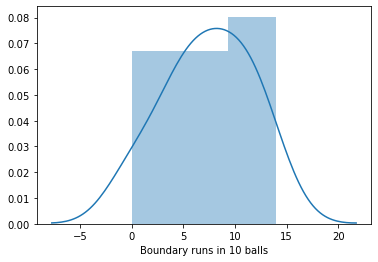

In [636]:
sns.distplot(qdk_runs_overall["Boundary runs in 10 balls"])

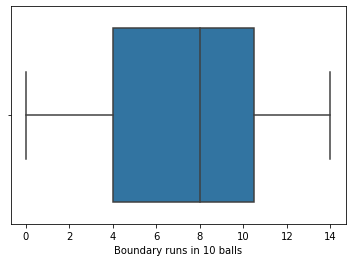

In [637]:
sns.boxplot(qdk_runs_overall["Boundary runs in 10 balls"])

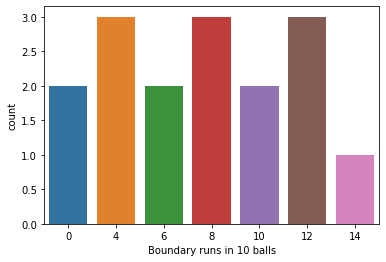

In [638]:
sns.countplot(qdk_runs_overall["Boundary runs in 10 balls"])

In [639]:
print("Average runs made by boundaries by QDK in first 10 balls overall :{}".format(round(qdk_runs_overall["Boundary runs in 10 balls"].mean())))

Average runs made by boundaries by QDK in first 10 balls overall :7


From all the above analysis done we found that on an average runs made by QDK in first 10 balls generally lies between 8-10.

## Bowler with best dot ball to total ball ratio for MI


In order to maintain the balance of sample size we will be considering the performance of MI bowlers for last 4 years. 

In [640]:
cond1 = matches["season"]==2014
cond2 = matches["season"]==2015
cond3 = matches["season"]==2018
cond4 = matches["season"]==2019
matches_recent = matches[cond1 | cond2 | cond3 | cond4]

- Bumrah

In [641]:
bumrah = matches_recent[matches_recent["bowler"]=="JJ Bumrah"]

In [642]:
bumrah_total = pd.DataFrame(bumrah.groupby(["match_id"])["ball"].count()) 

bumrah_total.columns = ["total balls"]

bumrah_total.reset_index(inplace = True)

bumrah_total

,match_id,total balls
0,462,12
1,479,27
2,484,24
3,490,25
4,493,24
5,497,18
6,501,20
7,505,24
8,508,24
9,513,25


In [643]:
bumrah12 = bumrah[bumrah["total_runs"]==0]

bumrah_dot = pd.DataFrame(bumrah12.groupby(["match_id"])["ball"].count())

bumrah_dot.columns = ["dot balls"]

bumrah_dot.reset_index(inplace = True)

bumrah_dot

,match_id,dot balls
0,462,4
1,479,13
2,484,12
3,490,7
4,493,9
5,497,6
6,501,6
7,505,9
8,508,7
9,513,11


In [644]:
bumrah_final = pd.merge(bumrah_total, bumrah_dot, on='match_id', how='inner')

bumrah_final

,match_id,total balls,dot balls
0,462,12,4
1,479,27,13
2,484,24,12
3,490,25,7
4,493,24,9
5,497,18,6
6,501,20,6
7,505,24,9
8,508,24,7
9,513,25,11


In [645]:
bumrah_final["ratio"] = round((bumrah_final["dot balls"]/bumrah_final["total balls"]) * 100)

bumrah_final

,match_id,total balls,dot balls,ratio
0,462,12,4,33.0
1,479,27,13,48.0
2,484,24,12,50.0
3,490,25,7,28.0
4,493,24,9,38.0
5,497,18,6,33.0
6,501,20,6,30.0
7,505,24,9,38.0
8,508,24,7,29.0
9,513,25,11,44.0


In [646]:
bumrah_final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
ratio,45.0,38.177778,10.327124,12.0,31.0,38.0,46.0,58.0


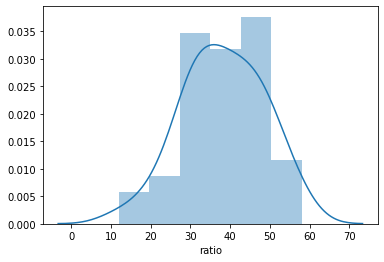

In [647]:
sns.distplot(bumrah_final["ratio"])

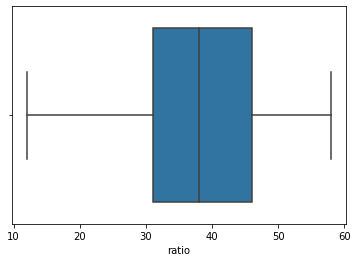

In [648]:
sns.boxplot(bumrah_final["ratio"])

In [649]:
print("Average dot ball percent of Bumrah against CSK :{}%".format(round(bumrah_final["ratio"].mean())))

Average dot ball percent of Bumrah against CSK :38%


- Rahul Chahar

In [650]:
chahar = matches_recent[matches_recent["bowler"]=="RD Chahar"]

In [651]:
chahar_total = pd.DataFrame(chahar.groupby(["match_id"])["ball"].count()) 

chahar_total.columns = ["total balls"]

chahar_total.reset_index(inplace = True)

chahar_total

,match_id,total balls
0,11151,13
1,11310,25
2,11315,24
3,11318,24
4,11322,24
5,11325,26
6,11327,24
7,11335,24
8,11338,25
9,11342,24


In [652]:
chahar12 = chahar[chahar["total_runs"]==0]

chahar_dot = pd.DataFrame(chahar12.groupby(["match_id"])["ball"].count())

chahar_dot.columns = ["dot balls"]

chahar_dot.reset_index(inplace = True)

chahar_dot

,match_id,dot balls
0,11151,5
1,11310,12
2,11315,12
3,11318,6
4,11322,9
5,11325,15
6,11327,10
7,11335,7
8,11338,7
9,11342,10


In [653]:
chahar_final = pd.merge(chahar_total, chahar_dot, on='match_id', how='inner')

chahar_final

,match_id,total balls,dot balls
0,11151,13,5
1,11310,25,12
2,11315,24,12
3,11318,24,6
4,11322,24,9
5,11325,26,15
6,11327,24,10
7,11335,24,7
8,11338,25,7
9,11342,24,10


In [654]:
chahar_final["ratio"] = round((chahar_final["dot balls"]/chahar_final["total balls"]) * 100)

chahar_final

,match_id,total balls,dot balls,ratio
0,11151,13,5,38.0
1,11310,25,12,48.0
2,11315,24,12,50.0
3,11318,24,6,25.0
4,11322,24,9,38.0
5,11325,26,15,58.0
6,11327,24,10,42.0
7,11335,24,7,29.0
8,11338,25,7,28.0
9,11342,24,10,42.0


In [655]:
chahar_final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
ratio,13.0,44.076923,12.579491,25.0,38.0,42.0,54.0,67.0


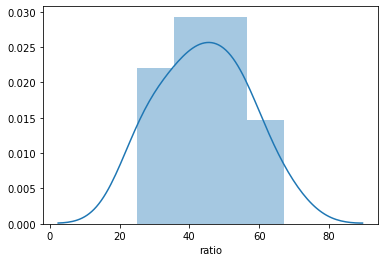

In [656]:
sns.distplot(chahar_final["ratio"])

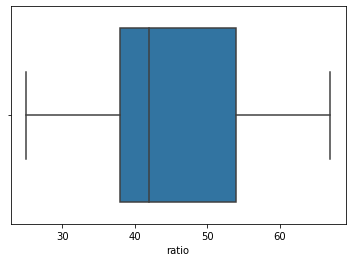

In [657]:
sns.boxplot(chahar_final["ratio"])

In [658]:
print("Average dot ball percent of Chahar against CSK :{}%".format(round(chahar_final["ratio"].mean())))

Average dot ball percent of Chahar against CSK :44%


- Trent Boult

In [659]:
Boult = matches_recent[matches_recent["bowler"]=="TA Boult"]

In [660]:
Boult_total = pd.DataFrame(Boult.groupby(["match_id"])["ball"].count()) 

Boult_total.columns = ["total balls"]

Boult_total.reset_index(inplace = True)

Boult_total

,match_id,total balls
0,521,25
1,525,29
2,529,26
3,541,26
4,544,26
5,551,24
6,564,25
7,7895,24
8,7899,18
9,7902,25


In [661]:
Boult12 = Boult[Boult["total_runs"]==0]

Boult_dot = pd.DataFrame(Boult12.groupby(["match_id"])["ball"].count())

Boult_dot.columns = ["dot balls"]

Boult_dot.reset_index(inplace = True)

Boult_dot

,match_id,dot balls
0,521,11
1,525,15
2,529,10
3,541,8
4,544,14
5,551,6
6,564,7
7,7895,11
8,7899,9
9,7902,5


In [662]:
Boult_final = pd.merge(Boult_total, Boult_dot, on='match_id', how='inner')

Boult_final

,match_id,total balls,dot balls
0,521,25,11
1,525,29,15
2,529,26,10
3,541,26,8
4,544,26,14
5,551,24,6
6,564,25,7
7,7895,24,11
8,7899,18,9
9,7902,25,5


In [663]:
Boult_final["ratio"] = round((Boult_final["dot balls"]/Boult_final["total balls"]) * 100)

Boult_final

,match_id,total balls,dot balls,ratio
0,521,25,11,44.0
1,525,29,15,52.0
2,529,26,10,38.0
3,541,26,8,31.0
4,544,26,14,54.0
5,551,24,6,25.0
6,564,25,7,28.0
7,7895,24,11,46.0
8,7899,18,9,50.0
9,7902,25,5,20.0


In [664]:
Boult_final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
ratio,26.0,35.923077,10.762613,20.0,26.5,36.0,45.5,54.0


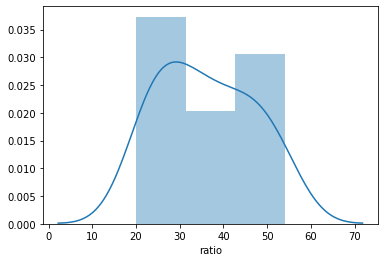

In [665]:
sns.distplot(Boult_final["ratio"])

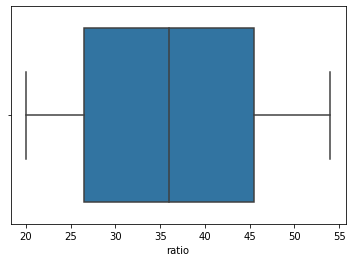

In [666]:
sns.boxplot(Boult_final["ratio"])

In [667]:
print("Average dot ball percent of Boult against CSK :{}%".format(round(Boult_final["ratio"].mean())))

Average dot ball percent of Boult against CSK :36%


- KH Pandya

In [668]:
krunal = matches_recent[matches_recent["bowler"]=="KH Pandya"]

In [669]:
krunal_total = pd.DataFrame(krunal.groupby(["match_id"])["ball"].count()) 

krunal_total.columns = ["total balls"]

krunal_total.reset_index(inplace = True)

krunal_total

,match_id,total balls
0,7900,12
1,7902,18
2,7907,25
3,7914,26
4,7916,13
5,7920,25
6,7924,24
7,7927,6
8,7930,18
9,7934,19


In [670]:
krunal12 = krunal[krunal["total_runs"]==0]

krunal_dot = pd.DataFrame(krunal12.groupby(["match_id"])["ball"].count())

krunal_dot.columns = ["dot balls"]

krunal_dot.reset_index(inplace = True)

krunal_dot

,match_id,dot balls
0,7900,3
1,7902,8
2,7907,9
3,7914,5
4,7916,3
5,7920,9
6,7924,10
7,7927,1
8,7930,7
9,7934,12


In [671]:
krunal_final = pd.merge(krunal_total, krunal_dot, on='match_id', how='inner')

krunal_final

,match_id,total balls,dot balls
0,7900,12,3
1,7902,18,8
2,7907,25,9
3,7914,26,5
4,7916,13,3
5,7920,25,9
6,7924,24,10
7,7927,6,1
8,7930,18,7
9,7934,19,12


In [672]:
krunal_final["ratio"] = round((krunal_final["dot balls"]/krunal_final["total balls"]) * 100)

krunal_final

,match_id,total balls,dot balls,ratio
0,7900,12,3,25.0
1,7902,18,8,44.0
2,7907,25,9,36.0
3,7914,26,5,19.0
4,7916,13,3,23.0
5,7920,25,9,36.0
6,7924,24,10,42.0
7,7927,6,1,17.0
8,7930,18,7,39.0
9,7934,19,12,63.0


In [673]:
krunal_final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
ratio,29.0,32.068966,15.120778,8.0,21.0,33.0,42.0,67.0


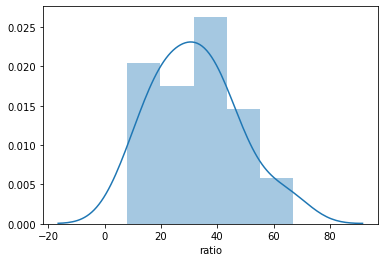

In [674]:
sns.distplot(krunal_final["ratio"])

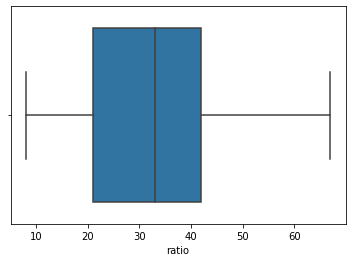

In [675]:
sns.boxplot(krunal_final["ratio"])

In [676]:
print("Average dot ball percent of K Pandya against CSK :{}%".format(round(krunal_final["ratio"].mean())))

Average dot ball percent of K Pandya against CSK :32%


- Coulter Nile

In [677]:
coulter = matches_recent[matches_recent["bowler"]=="NM Coulter-Nile"]

In [678]:
coulter_total = pd.DataFrame(coulter.groupby(["match_id"])["ball"].count()) 

coulter_total.columns = ["total balls"]

coulter_total.reset_index(inplace = True)

coulter_total

,match_id,total balls
0,463,26
1,519,25
2,523,25
3,528,19
4,531,24
5,535,25
6,539,27
7,543,22
8,548,25
9,553,24


In [679]:
coulter12 = coulter[coulter["total_runs"]==0]

coulter_dot = pd.DataFrame(coulter12.groupby(["match_id"])["ball"].count())

coulter_dot.columns = ["dot balls"]

coulter_dot.reset_index(inplace = True)

coulter_dot

,match_id,dot balls
0,463,12
1,519,11
2,523,9
3,528,13
4,531,10
5,535,9
6,539,11
7,543,10
8,548,13
9,553,7


In [680]:
coulter_final = pd.merge(coulter_total, coulter_dot, on='match_id', how='inner')

coulter_final

,match_id,total balls,dot balls
0,463,26,12
1,519,25,11
2,523,25,9
3,528,19,13
4,531,24,10
5,535,25,9
6,539,27,11
7,543,22,10
8,548,25,13
9,553,24,7


In [681]:
coulter_final["ratio"] = round((coulter_final["dot balls"]/coulter_final["total balls"]) * 100)

coulter_final

,match_id,total balls,dot balls,ratio
0,463,26,12,46.0
1,519,25,11,44.0
2,523,25,9,36.0
3,528,19,13,68.0
4,531,24,10,42.0
5,535,25,9,36.0
6,539,27,11,41.0
7,543,22,10,45.0
8,548,25,13,52.0
9,553,24,7,29.0


In [682]:
coulter_final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
ratio,12.0,44.916667,9.876127,29.0,39.75,44.5,50.0,68.0


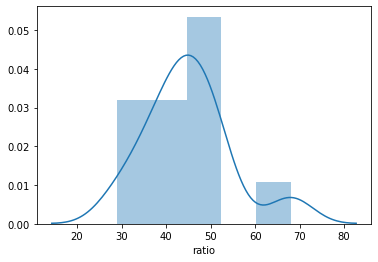

In [683]:
sns.distplot(coulter_final["ratio"])

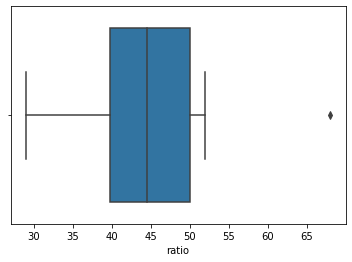

In [684]:
sns.boxplot(coulter_final["ratio"])

In [685]:
print("Average dot ball percent of Coulter Nile against CSK :{}%".format(round(coulter_final["ratio"].mean())))

Average dot ball percent of Coulter Nile against CSK :45%


From all the above analysis of bowlers of MI , their sample size etc we can predict Rahul Chahar to have best dot ball to total bowls bowled ratio.

## no of overs with 4 and 6 in same over

In [686]:
col = CSK_MI[["match_id","over","ball","batsman_runs"]]

c = col["batsman_runs"]==4
d = col["batsman_runs"]==6
c = c.replace({False:0 , True: 1})
d = d.replace({False:0 , True: 1})

c = list(c)
d = list(d)

In [687]:
col["is_four"] = c
col["is_six"] = d

In [688]:
col

,match_id,over,ball,batsman_runs,is_four,is_six
15486,67,1,1,0,0,0
15487,67,1,2,0,0,0
15488,67,1,3,0,0,0
15489,67,1,4,0,0,0
15490,67,1,5,4,1,0
...,...,...,...,...,...,...
179073,11415,20,2,1,0,0
179074,11415,20,3,2,0,0
179075,11415,20,4,1,0,0
179076,11415,20,5,2,0,0


In [689]:
col12 = pd.DataFrame(col.groupby(["match_id","over"]).agg({"is_four":"sum","is_six":"sum"}))

#col12.reset_index(inplace = True)

col12

is_four  is_six
match_id over                 
67       1           2       0
         2           2       0
         3           4       1
         4           1       0
         5           4       1
...                ...     ...
11415    16          4       1
         17          0       1
         18          0       5
         19          2       0
         20          2       0

[560 rows x 2 columns]

In [690]:
final123 = col12[(col12["is_four"]>=1)&(col12["is_six"]>=1)]

final123.reset_index(inplace = True)

In [691]:
final_over = pd.DataFrame(final123.groupby("match_id")["over"].count())

final_over

,over
match_id,
67,11
96,5
118,3
162,7
194,6
211,2
234,8
257,7
308,5


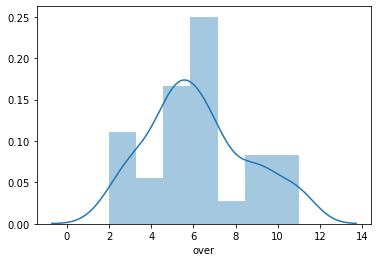

In [692]:
sns.distplot(final_over["over"])

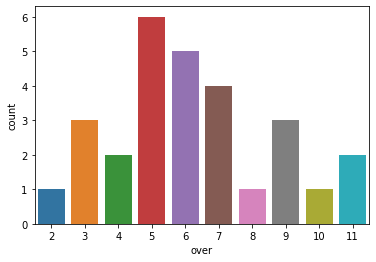

In [693]:
sns.countplot(final_over["over"])

In [694]:
print("Average no of overs expected to have both 4 and 6 in same over in this match :{}".format(round(final_over["over"].mean())))

Average no of overs expected to have both 4 and 6 in same over in this match :6


## Confidence Interval Calculation

In [695]:
final_over.describe().T

,count,mean,std,min,25%,50%,75%,max
over,28.0,6.214286,2.409198,2.0,5.0,6.0,7.25,11.0


In [696]:
mean = final_over["over"].mean()
sd = final_over["over"].std()
n = len(final_over)

n

28

In [697]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.455295539976618

In [698]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the overs that could have both 4 and 6 in same over in this match :{}".format((lcb, ucb)))

95% Confidence Interval for the overs that could have both 4 and 6 in same over in this match :(5.0, 7.0)
